In [3]:
import networkx as nx
import numpy as np
import torch
from train import get_connected_graph

In [272]:
from gen_iid_data import repeat_data

KeyboardInterrupt: 

In [4]:
start = torch.stack([
    torch.ones(2, 2),
    torch.ones(2, 2)*2,
    torch.ones(2, 2)*3,
    torch.ones(2, 2)*4,
    torch.ones(2, 2)*5
])
start

tensor([[[1., 1.],
         [1., 1.]],

        [[2., 2.],
         [2., 2.]],

        [[3., 3.],
         [3., 3.]],

        [[4., 4.],
         [4., 4.]],

        [[5., 5.],
         [5., 5.]]])

In [5]:
start = start.reshape(5, -1)

In [495]:
param = 0.7
num_nodes = 5
factor = 2
graph = get_connected_graph(num_nodes, param, topology='rgg')
graph = pkl.load(open('../graphs/topology_rgg_degree_3.2_rho_0.7500.pkl', 'rb'))
is_conn = nx.is_connected(graph)
print('is_connected: ', is_conn)
max_d = max(dict(graph.degree()).values())
print('max_degree: ', max_d)
avg_d = sum(dict(graph.degree()).values())/len(graph)
print('avg_degree: ', avg_d)
d = 1/(factor*max_d)
print('d: {:.6f}'.format(d))
L = nx.laplacian_matrix(graph).toarray()
eig, _ = np.linalg.eig(L)
print('rho(L): ', max(eig))
V = torch.Tensor(np.eye(num_nodes) - d*L)
eig, _ = np.linalg.eig(V)
print('rho(V): ', max(eig))
Z = V - 1/num_nodes
eig, _ = np.linalg.eig(Z)
print('rho(Z): ', max(eig))

is_connected:  True
max_degree:  4
avg_degree:  3.2
d: 0.125000
rho(L):  5.000000000000002
rho(V):  1.0
rho(Z):  0.75


In [1]:
from arguments import Arguments as A
from consensus import get_alpha_closed_form

args = A()

In [8]:
args.dynamic_delta = False
args.delta = 0
get_alpha_closed_form(args, 2.55, 31, 5, 3, 7840)

(8.190261786083755e-07, [60000, 0.1, 0, 10, 2.55, 7840, 5, 3])

In [15]:
import torch
a = torch.ones(10,)
b = torch.zeros(20,)
torch.cat([a, b, a])

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.])

In [ ]:
import pickle as pkl
pkl.dump(open('../graphs/{}_deg_{:d}_p_{:.4f}'.format(topology, avg_deg, rho)

In [149]:
log = np.log2

(log(9.7)-2*log((20**2)*0.24))/(2*log(0.80))

15.363586482881503

In [ ]:
../history/history_mnist_svm_fog_uniform_non_iid_1_num_workers_200_lr_0.01_batch_300_laplace_rounds_2_radius_0.7_d2d_1.0_factor_2_alpha_20.pkl
../history/history_mnist_svm_fog_uniform_non_iid_1_num_workers_200_lr_0.01_batch_300_laplace_rounds_2_radius_0.7_d2d_1.0_factor_2_alpha_20.pkl
../history/history_mnist_svm_fog_uniform_non_iid_1_num_workers_500_lr_0.01_batch_120_laplace_rounds_2_radius_0.7_d2d_1.0_factor_2_alpha_False.pkl
mnist_svm_fog_uniform_non_iid_1_num_workers_1000_lr_0.01_batch_60_laplace_rounds_2_radius_0.7_d2d_1.0_factor_2_alpha_False
mnist_svm_fog_uniform_non_iid_10_num_workers_200_lr_0.01_batch_300_laplace_rounds_2_radius_0.7_d2d_1.0_factor_2_alpha_0.01
# iid case with static alpha
../history/history_mnist_svm_fog_uniform_non_iid_10_num_workers_500_lr_0.01_batch_120_laplace_rounds_2_radius_0.7_d2d_1.0_factor_2_alpha_False_dyn_False.pkl
# iid with dynamic alpha
../history/history_mnist_svm_fog_uniform_non_iid_10_num_workers_500_lr_0.01_batch_120_laplace_rounds_2_radius_0.7_d2d_1.0_factor_2_alpha_False_dyn_True.pkl

In [154]:
import pickle as pkl
x_ax, y_ax, l_test, grad_tr, rounds_tr, div_tr = pkl.load(open('../history/history_mnist_svm_fog_uniform_non_iid_1_num_workers_500_lr_0.01_batch_120_laplace_rounds_2_radius_0.7_d2d_1.0_factor_2_alpha_False.pkl', 'rb')) 

In [155]:
from collections import defaultdict

x_ax = list(range(25))
d_ax = defaultdict(list)
r_ax = defaultdict(list)
d_1 = defaultdict(list)
r_1 = defaultdict(list)
for l in range(4):
    for div in div_tr:
        d_ax[l].append(sum(div[l])/len(div[l]))
        d_1[l].append(div[l][0])
    for r in rounds_tr:
        r_ax[l].append(sum(r[l])/len(r[l]))
        r_1[l].append(r[l][0])

In [281]:
eta = 1/0.1
lr = 0.0001
mu = 0.1
delta = mu/(2*eta)
D = 60000
grad = 0.29
phi = 25
omega = 7840
N = 5
L = 2
alpha = ((D**2) * mu* (mu - delta * eta) *(grad**2)) / ((eta**4)* phi * (omega**2)* N * L)
alpha

9.851364014993752e-09

In [434]:
alpha = 1e-8
L = 5
div = 2e-5
rho = 0.96
print((np.log2(alpha) - 2*np.log2((L**2)*(div)))/(2*np.log2(rho)))

div = 8
print((np.log2(alpha) - 2*np.log2((L**2)*(div)))/(2*np.log2(rho)))

19.712876983944586
335.699882951763


In [316]:
eta = 1/0.001
mu = 1e-5
delta = mu/(2*eta)
D = 

SyntaxError: invalid syntax (<ipython-input-316-909056cfdd41>, line 4)

In [163]:
import torch
from svm import SVM
model = SVM()
for p in model.parameters():
    print(p.flatten().size()[0])

7840
10


In [159]:
for _ in y_trains:
    print(np.bincount(_))

[30 34 30 31 29 27 29 31 29 30]
[30 34 30 31 29 27 29 31 29 30]
[30 34 30 31 29 27 29 31 29 30]
[30 34 30 31 29 27 29 31 29 30]
[30 34 30 31 29 27 29 31 29 30]
[30 34 30 31 29 27 29 31 29 30]
[29 34 30 31 29 27 30 31 29 30]
[30 34 30 31 29 27 29 31 29 30]
[29 34 30 31 29 27 30 31 29 30]
[30 34 30 31 29 27 29 31 29 30]
[29 34 30 31 29 27 30 31 29 30]
[29 34 30 31 29 27 30 31 29 30]
[30 34 30 31 29 27 29 31 29 30]
[30 34 30 31 29 27 29 31 29 30]
[29 34 30 31 29 27 30 31 29 30]
[30 34 30 31 29 27 29 31 29 30]
[29 34 30 31 29 27 30 31 29 30]
[29 34 30 31 29 27 30 31 29 30]
[30 34 30 31 29 27 29 31 29 30]
[29 34 30 31 29 27 30 31 29 30]
[30 34 30 31 29 27 29 31 29 30]
[30 34 30 30 29 27 30 31 29 30]
[30 34 30 31 29 27 29 31 29 30]
[29 34 30 31 29 27 30 31 29 30]
[29 34 30 31 29 27 30 31 29 30]
[30 34 30 31 29 27 29 31 29 30]
[30 34 30 30 29 27 30 31 29 30]
[30 34 30 31 29 27 29 31 29 30]
[29 34 30 31 29 27 30 31 29 30]
[30 34 30 30 29 27 30 31 29 30]
[30 34 30 31 29 27 29 31 29 30]
[29 34 3

In [28]:
import matplotlib.pyplot as plt
import numpy as np
k = np.array(range(5, 26, 5))
k

array([ 5, 10, 15, 20, 25])

In [29]:
e = 0.08*((1-0.05)**k)
e

array([0.06190247, 0.04789896, 0.0370633 , 0.02867887, 0.02219117])

In [26]:
eps = np.array(range(2, 7,))/100
k = np.ceil(np.log(eps/0.0776)/np.log(1-0.05))
eps, k

(array([0.02, 0.03, 0.04, 0.05, 0.06]), array([27., 19., 13.,  9.,  6.]))

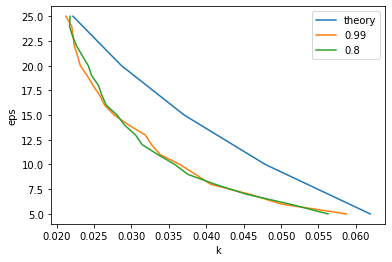

In [31]:
import pickle as pkl
plt.plot(e, k, label='theory')
for mul in [0.99, 0.8]:
    x_ax, y_ax, l_test, _, _, _ = pkl.load(open('../history/history_mnist_svm_fog_uniform_non_iid_1_num_workers_125_lr_0.004_decay_0.1_batch_480_laplace_rounds_2_radius_graph_multi_d2d_1.0_factor_4_alpha_0.9_dyn_True_delta_multiplier_{}_omega_1.1.pkl'.format(mul), 'rb'))
    plt.plot(l_test[4:26], x_ax[4:26], label=str(mul))

plt.legend()
plt.xlabel('k')
plt.ylabel('eps')
plt.savefig('../plots/tmp.png')

In [38]:
from torchvision import datasets, transforms
import torch
from arguments import Arguments

args = Arguments()
kwargs = {}

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True, transform=tranforms.Compose([
        transforms.ToTensor()
    ])),
    batch_size=args.num_train, shuffle=False, **kwargs)


In [39]:
for data, target in train_loader:
    print('done')

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.Image.Image'>